# Proyecto Final
### Proyecto: 
#### Integrantes:
- Armando Arzola Pérez
- Yessica Fabiola Santiago Valdes 
- Karla Paola Clavel Ojeda.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


df = pd.read_csv("train.csv"); 

In [2]:
df.shape

(200, 8)

In [3]:
df.head()

,id,prompt,A,B,C,D,E,answer
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D


In [4]:
df.columns

Index(['id', 'prompt', 'A', 'B', 'C', 'D', 'E', 'answer'], dtype='object')

In [5]:
#Datos unicos
df.nunique(axis=0)

id        200
prompt    200
A         200
B         200
C         200
D         200
E         200
answer      5
dtype: int64

In [6]:
#valores NaN contados de cada atributo
df.isna().sum()

id        0
prompt    0
A         0
B         0
C         0
D         0
E         0
answer    0
dtype: int64

In [7]:
df_cleaned = df

In [8]:
df_cleaned[['prompt', 'A']]

,prompt,A
0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...
2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...
...,...,...
195,What is the relation between the three moment ...,The three moment theorem expresses the relatio...
196,"What is the throttling process, and why is it ...",The throttling process is a steady flow of a f...
197,What happens to excess base metal as a solutio...,"The excess base metal will often solidify, bec..."
198,"What is the relationship between mass, force, ...",Mass is a property that determines the weight ...


In [9]:
df_cleaned['A']

0      MOND is a theory that reduces the observed mis...
1      Dynamic scaling refers to the evolution of sel...
2      The triskeles symbol was reconstructed as a fe...
3      Regularizing the mass-energy of an electron wi...
4      The angular spacing of features in the diffrac...
                             ...                        
195    The three moment theorem expresses the relatio...
196    The throttling process is a steady flow of a f...
197    The excess base metal will often solidify, bec...
198    Mass is a property that determines the weight ...
199    Arthur Eddington showed that two of Einstein's...
Name: A, Length: 200, dtype: object

In [10]:
df_cleaned.iloc[0]

id                                                        0
prompt    Which of the following statements accurately d...
A         MOND is a theory that reduces the observed mis...
B         MOND is a theory that increases the discrepanc...
C         MOND is a theory that explains the missing bar...
D         MOND is a theory that reduces the discrepancy ...
E         MOND is a theory that eliminates the observed ...
answer                                                    D
Name: 0, dtype: object

In [11]:
df_cleaned['A']=1
df_cleaned['B']=2
df_cleaned['C']=3
df_cleaned['D']=4
df_cleaned['E']=5

df_cleaned.head()

,id,prompt,A,B,C,D,E,answer
0,0,Which of the following statements accurately d...,1,2,3,4,5,D
1,1,Which of the following is an accurate definiti...,1,2,3,4,5,A
2,2,Which of the following statements accurately d...,1,2,3,4,5,A
3,3,What is the significance of regularization in ...,1,2,3,4,5,C
4,4,Which of the following statements accurately d...,1,2,3,4,5,D


In [12]:
df_cleaned.loc[df_cleaned["answer"] == "A", "answer"] = 1
df_cleaned.loc[df_cleaned["answer"] == "B", "answer"] = 2
df_cleaned.loc[df_cleaned["answer"] == "C", "answer"] = 3
df_cleaned.loc[df_cleaned["answer"] == "D", "answer"] = 4
df_cleaned.loc[df_cleaned["answer"] == "E", "answer"] = 5

df_cleaned.head()

,id,prompt,A,B,C,D,E,answer
0,0,Which of the following statements accurately d...,1,2,3,4,5,4
1,1,Which of the following is an accurate definiti...,1,2,3,4,5,1
2,2,Which of the following statements accurately d...,1,2,3,4,5,1
3,3,What is the significance of regularization in ...,1,2,3,4,5,3
4,4,Which of the following statements accurately d...,1,2,3,4,5,4


In [13]:
df_cleaned = df_cleaned.copy().drop(['prompt'], axis=1)
df_cleaned.head()

,id,A,B,C,D,E,answer
0,0,1,2,3,4,5,4
1,1,1,2,3,4,5,1
2,2,1,2,3,4,5,1
3,3,1,2,3,4,5,3
4,4,1,2,3,4,5,4


<AxesSubplot:>

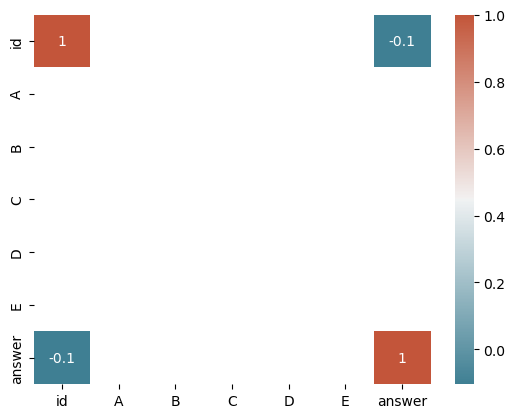

In [14]:
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [15]:
df_cleaned.to_csv('exam.csv')